In [21]:

#import libraries
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from sklearn import datasets, linear_model
from statsmodels.api import OLS
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set_style('darkgrid')


In [22]:
#load datasets
df1 = xr.open_dataset('aqua.nc')

aqua = df1['AOD_550_Dark_Target_Deep_Blue_Combined_Mean_Mean']




In [30]:
#selecting area of interest, West Africa
#fig = plt.figure(figsize=(12,10))
West_Africa = aqua.sel(time=slice('2003-01','2019-12')).sel(lon=np.arange(-25.5,20.5,1),lat=np.arange(-0.5, 25.5, 1),method= 'nearest')
#West_Africa.plot()

In [31]:
#converting to pandas frame
WestAfrica = West_Africa.to_dataframe()

#resetting the index
#y = WestAfrica.reset_index()
#y.columns = ['Date','AOD']

In [18]:
WestAfrica.describe()

,AOD_550_Dark_Target_Deep_Blue_Combined_Mean_Mean
count,204.000000
mean,0.401739
std,0.100663
min,0.198938
25%,0.329009
50%,0.399722
75%,0.459353
max,0.811858


In [32]:
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=13)

ConversionError: Failed to convert value(s) to axis units: array([(Timestamp('2003-01-16 12:00:00'), -0.5, -25.5),
       (Timestamp('2003-01-16 12:00:00'), -0.5, -24.5),
       (Timestamp('2003-01-16 12:00:00'), -0.5, -23.5), ...,
       (Timestamp('2019-12-16 12:00:00'), 24.5, 17.5),
       (Timestamp('2019-12-16 12:00:00'), 24.5, 18.5),
       (Timestamp('2019-12-16 12:00:00'), 24.5, 19.5)], dtype=object)

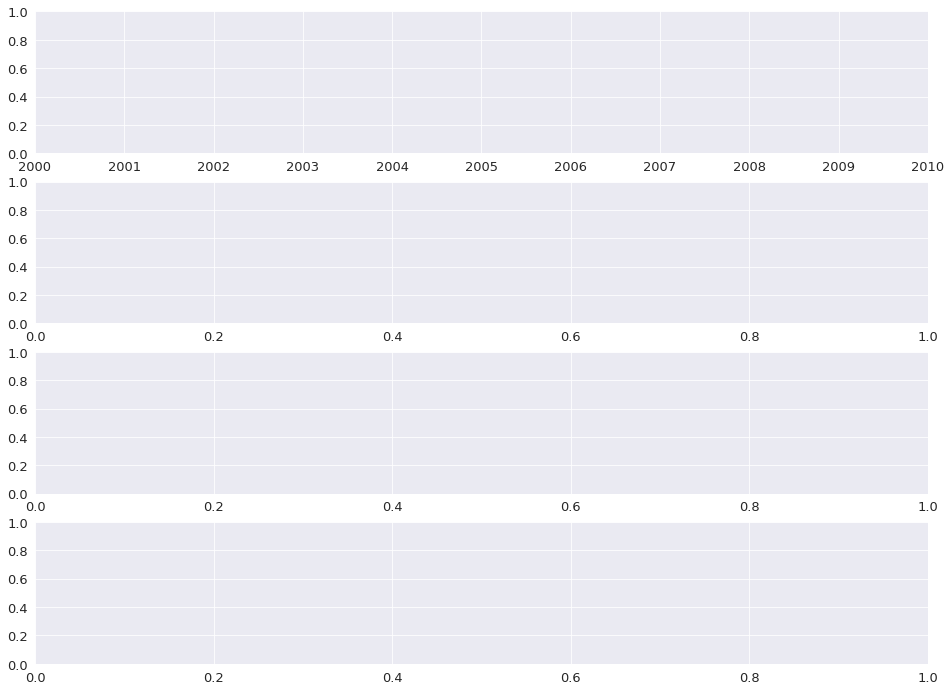

In [33]:
#decomposing trends, seasonal and residuals
result =seasonal_decompose(WestAfrica.dropna(), model="additive",period = 12)
fig = result.plot()

In [21]:
signal = result.trend+result.seasonal+result.resid
#removing seasonality
signal_deseason = result.trend+result.resid

In [22]:
#signal.plot()
a = signal_deseason.dropna()    
#signal_deseason.plot()    

In [23]:
seas= result.seasonal

NameError: name 'tre' is not defined

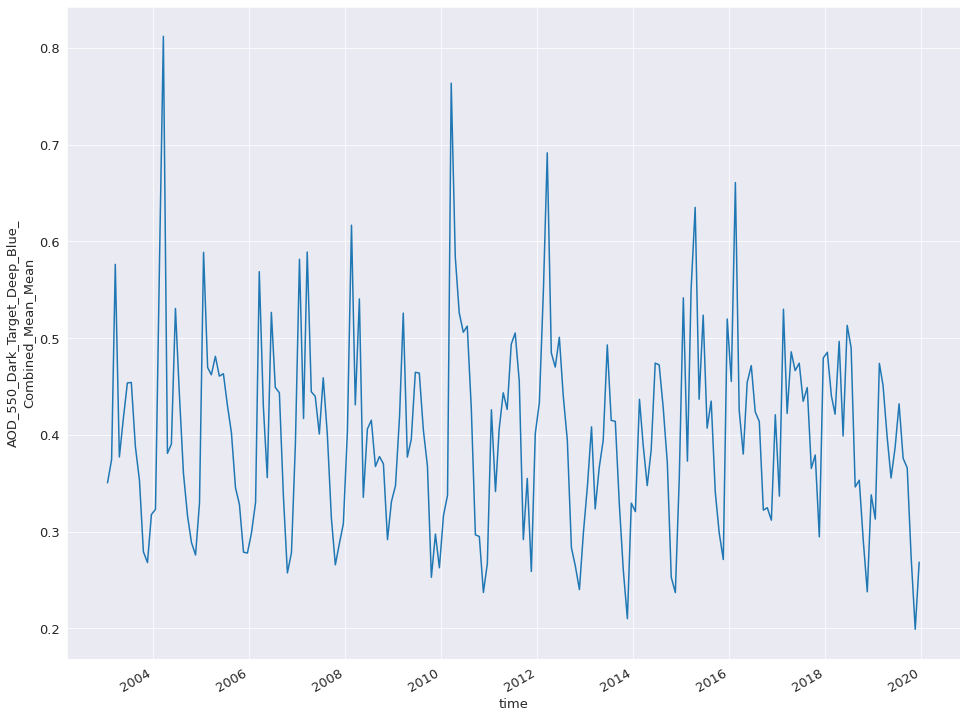

In [25]:
#plotting the main data with the trends
West_Africa.plot(label = 'observed')
tre.plot(label = 'trend')
plt.legend(loc='best')

In [26]:
#linear regression model  
#resetting the index of the datasets
West = WestAfrica.reset_index()
West.columns = ['Date','AOD']

#selecting the values for regression

x_t = np.array(pd.to_datetime(West['Date']).index.values,dtype = float)
y_val = np.array(West['AOD'].values, dtype = float)


#reshaping the x,y components

#x = x_t.reshape(-1,1)

y = y_val.reshape(-1,1)

In [30]:
#training the datasets
x_train,x_test,y_train,y_test = train_test_split(x_t,y,test_size=0.2)


In [32]:
#linear regression
model = np.polyfit(x_train,y_train, 1)


In [33]:
#y_pred = model.predict(x_test)
#score model
#r_q = model.score(x_test, y_pred)

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [ ]:
r_q


In [ ]:
plt.scatter(x,y, marker = '*')
plt.plot(x_test,y_pred,color = 'red')

In [ ]:
print(model.coef_)

In [ ]:
print(model.intercept_)

In [ ]:
#equation of the line
#y = -3.7376e-05x+0.40614

In [ ]:
#finding root mean squared error
msr = np.mean((y_pred-y_test)**2)
print(msr)

In [16]:
#saving the datasets

new_filename_1 = './West_Africa_aqua2.nc'
print ('saving to ', new_filename_1)
West_Africa.to_netcdf(path=new_filename_1)
print ('finished saving')

saving to  ./West_Africa_aqua2.nc
finished saving


In [17]:
#regression with the OLS
from statsmodels.api import OLS
import statsmodels.api as sm
mod = sm.OLS( y, x)
res = mod.fit()
print(res.summary())

NameError: name 'y' is not defined

In [ ]:
#linear fit on the deseasonalised dA
#deseason = a.reset_index()
#deseason.columns = ['Date','AOD']

#selecting the values for regression

#x_t1 = np.array(pd.to_datetime(deseason['Date']).index.values,dtype = float)
#y_val1 = np.array(deseason['AOD'].values, dtype = float)


#reshaping the x,y components

#x1 = x_t1.reshape(-1,1)

#y1 = y_val1.reshape(-1,1)

#linear regression
#model = LinearRegression()
#model.fit(x1,y1)




In [ ]:
plt.scatter(x,y)